#### Question 1

The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

    1. Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.
    2. Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.
    3. Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.
    4. Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.


Rest of India ---> 705
Delhi-NCR ---> 7947


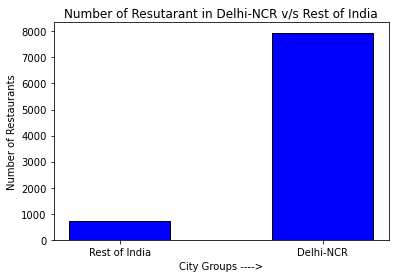

Rest of India - 705
Delhi-NCR - 7947


In [64]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

zomato = pd.read_csv('E:\Coding Ninjas Data Science\Dataset\zomato.csv', encoding='latin-1')
df = zomato.copy()
df = df[df['Country Code'] == 1]

ncr_list = ['New Delhi', 'Ghaziabad', 'Noida', 'Gurgaon', 'Faridabad']
for city in ncr_list:
    df.loc[df['City']==city, 'City'] = 'Delhi-NCR'

count = defaultdict(int)

for city in df.City:
    if city == 'Delhi-NCR':
        count['Delhi-NCR'] += 1
    else:
        count['Rest of India'] += 1

xaxis = []
yaxis = []

for key, value in count.items():
    print(key, '--->', value)
    xaxis.append(key)
    yaxis.append(value)
    
plt.bar(xaxis, yaxis, color='blue', edgecolor='black', width=0.5)
plt.xlabel('City Groups ---->')
plt.ylabel('Number of Restaurants')
plt.title('Number of Resutarant in Delhi-NCR v/s Rest of India')
plt.show()

print(xaxis[0], '-', yaxis[0])
print(xaxis[1], '-', yaxis[1])

In [72]:
import requests
## api key - 63a434645f53cc850611fe8af9724593

ncr_cuisines = set()
for cuisine in ncr_df.Cuisines:
    for c in cuisine.split(','):
        ncr_cuisines.add(c.strip())

rest_cuisines = set()
for cuisine in rest_df.Cuisines:
    for c in cuisine.split(','):
        rest_cuisines.add(c.strip())
        
cuisine_not_in_ncr = rest_cuisines.difference(ncr_cuisines)

r = requests.get('https://developers.zomato.com/api/v2.1/cuisines', params={"user-key":"63a434645f53cc850611fe8af9724593", "city_id":1}, headers={"accept":"application/json","user-key":"63a434645f53cc850611fe8af9724593"})
data = r.json()

cuisine_available_in_ncr = []

for c in data['cuisines']:
    if c['cuisine']['cuisine_name'] in cuisine_not_in_ncr:
        cuisine_available_in_ncr.append(c['cuisine']['cuisine_name'])
        
print('Cuisines not in NCR according to dataset', '-', cuisine_not_in_ncr)
print('Cuisines available from the according to API', '-',cuisine_available_in_ncr)

Cuisines not in NCR according to dataset - {'German', 'Cajun', 'Malwani', 'BBQ'}
Cuisines available from the according to API - ['BBQ', 'Malwani']


North Indian ----> 3597
Chinese ----> 2448
Fast Food ----> 1866
Mughlai ----> 933
Bakery ----> 697
South Indian ----> 569
Continental ----> 547
Desserts ----> 542
Street Food ----> 538
Italian ----> 535


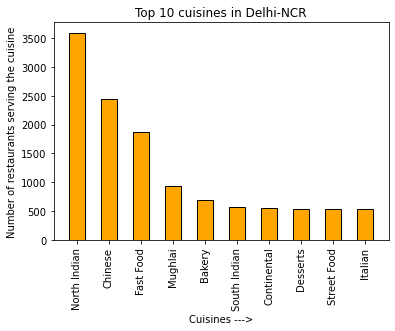

In [92]:
ncr_df = df[df['City'] == 'Delhi-NCR']

cuisines = []

for cuisine in ncr_df['Cuisines']:
    for item in cuisine.split(','):
        cuisines.append(item.strip())

cuisine_ncr = defaultdict(int)

for cuisine in cuisines:
    cuisine_ncr[cuisine] += 1
    
xaxis = []
yaxis = []

for key, value in cuisine_ncr.items():
    xaxis.append(key)
    yaxis.append(value)
    
np_xaxis = np.array(xaxis)
np_yaxis = np.array(yaxis, dtype=int)

np_xaxis = np_xaxis[np.argsort(np_yaxis)]
np_yaxis = np.sort(np_yaxis)

np_xaxis = np_xaxis[::-1]
np_yaxis = np_yaxis[::-1]

np_xaxis = np_xaxis[:10]
np_yaxis = np_yaxis[:10]

plt.bar(np_xaxis, np_yaxis, color='orange', edgecolor='black', width=0.5)
plt.xlabel('Cuisines --->')
plt.ylabel('Number of restaurants serving the cuisine')
plt.xticks(rotation='vertical')
plt.title('Top 10 cuisines in Delhi-NCR')
plt.show

for i in range(len(np_xaxis)):
    print(np_xaxis[i], '---->', np_yaxis[i])
    

North Indian ----> 349
Chinese ----> 242
Continental ----> 177
Italian ----> 147
Cafe ----> 136
Fast Food ----> 97
South Indian ----> 62
Mughlai ----> 59
Desserts ----> 55
Mexican ----> 50


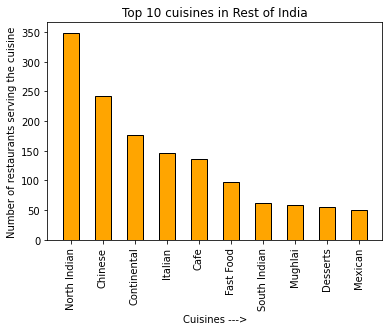

In [93]:
rest_df = df[df['City'] != 'Delhi-NCR']

cuisines = []

for cuisine in rest_df['Cuisines']:
    for item in cuisine.split(','):
        cuisines.append(item.strip())

cuisine_rest = defaultdict(int)

for cuisine in cuisines:
    cuisine_rest[cuisine] += 1
    
xaxis = []
yaxis = []

for key, value in cuisine_rest.items():
    xaxis.append(key)
    yaxis.append(value)
    
np_xaxis = np.array(xaxis)
np_yaxis = np.array(yaxis, dtype=int)

np_xaxis = np_xaxis[np.argsort(np_yaxis)]
np_yaxis = np.sort(np_yaxis)

np_xaxis = np_xaxis[::-1]
np_yaxis = np_yaxis[::-1]

np_xaxis = np_xaxis[:10]
np_yaxis = np_yaxis[:10]

plt.bar(np_xaxis, np_yaxis, color='orange', edgecolor='black', width=0.5)
plt.xlabel('Cuisines --->')
plt.ylabel('Number of restaurants serving the cuisine')
plt.xticks(rotation='vertical')
plt.title('Top 10 cuisines in Rest of India')
plt.show

for i in range(len(np_xaxis)):
    print(np_xaxis[i], '---->', np_yaxis[i])
    

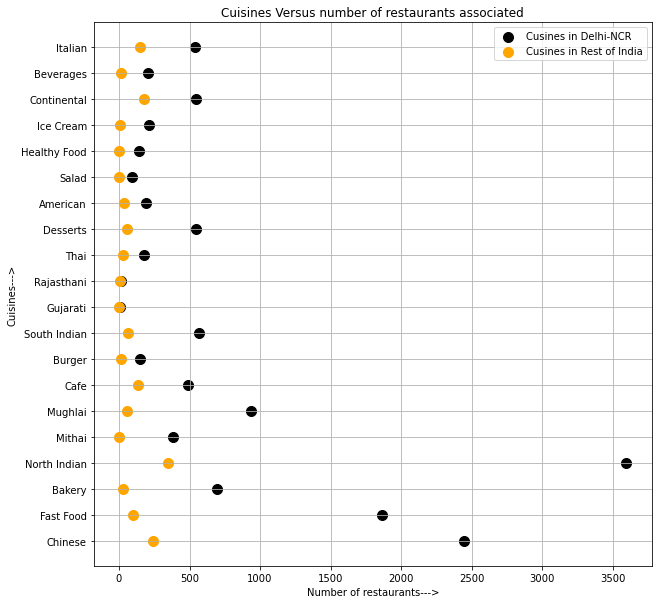

In [106]:
li = []
in_ncr = []
in_rest = []

for key in cuisine_ncr:
    if key in cuisine_rest:
        li.append(key)
        in_ncr.append(cuisine_ncr[key])
        in_rest.append(cuisine_rest[key])

li = li[:20]
in_ncr = in_ncr[:20]
in_rest = in_rest[:20]

plt.figure(figsize=(10, 10))
plt.scatter(in_ncr, li, color='black', s=100)
plt.scatter(in_rest, li, color='orange', s=100)
plt.xlabel('Number of restaurants--->')
plt.ylabel('Cuisines--->')
plt.title('Cuisines Versus number of restaurants associated')
plt.legend(['Cusines in Delhi-NCR', 'Cusines in Rest of India'])
plt.grid()
plt.show()




### Detailed Analysis

From the above graph "North Indian" cuisine is the most popular among restaurants of Delhi-NCR region as well as other states. In the above graph 30 important cuisines which are common in both Delhi-NCR and other states are plotted. There are some cuisines present in other states and are not present in any restaurant of Delhi-NCR. Following North Indian cuisine we have Chinese cuisine with 2448 restaurants in Delhi-NCR and 242 in other states of India. After these two we have fast food with 1866 restaurants in Delhi-NCR and 97 in other states (a huge difference). After this we have Mughlai cuisine in Delhi-NCR with 933 restaurants and 59 in the states other than Delhi-NCR. There are many more cuisines as show in the graph.
